In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%config IPCompleter.greedy = True
import numpy as np

In [31]:
df = pd.read_csv("../dataset/imdb_movies_india.csv", encoding="cp1252")

In [33]:
df.columns = df.columns.str.lower()

In [34]:
df["votes"] = df["votes"].astype(str).str.replace(',', '')
df["votes"] = pd.to_numeric(df["votes"], errors='coerce')
df["rating"] = pd.to_numeric(df["rating"], errors='coerce')

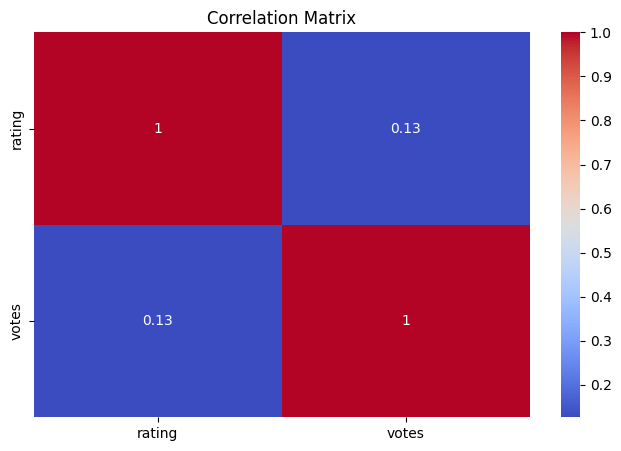

In [35]:
plt.figure(figsize=(8, 5))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

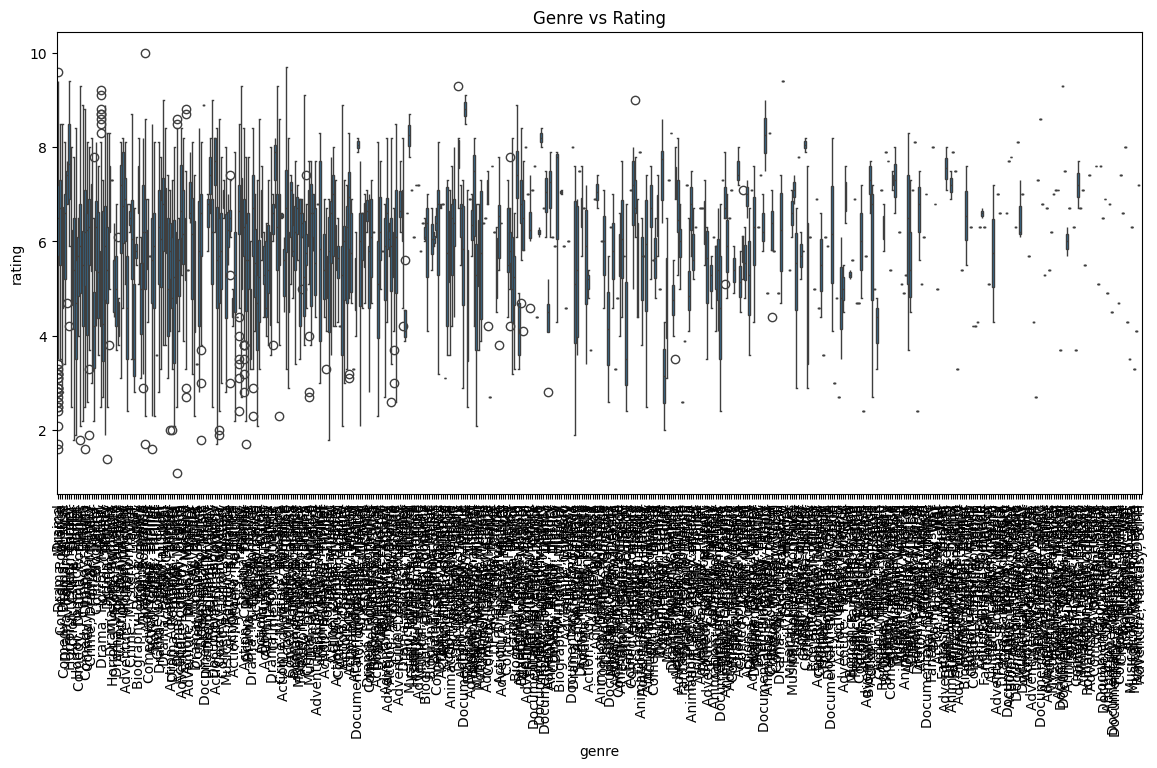

In [36]:
plt.figure(figsize=(14, 6))
sns.boxplot(x="genre", y="rating", data=df)
plt.xticks(rotation=90)
plt.title("Genre vs Rating")
plt.show()

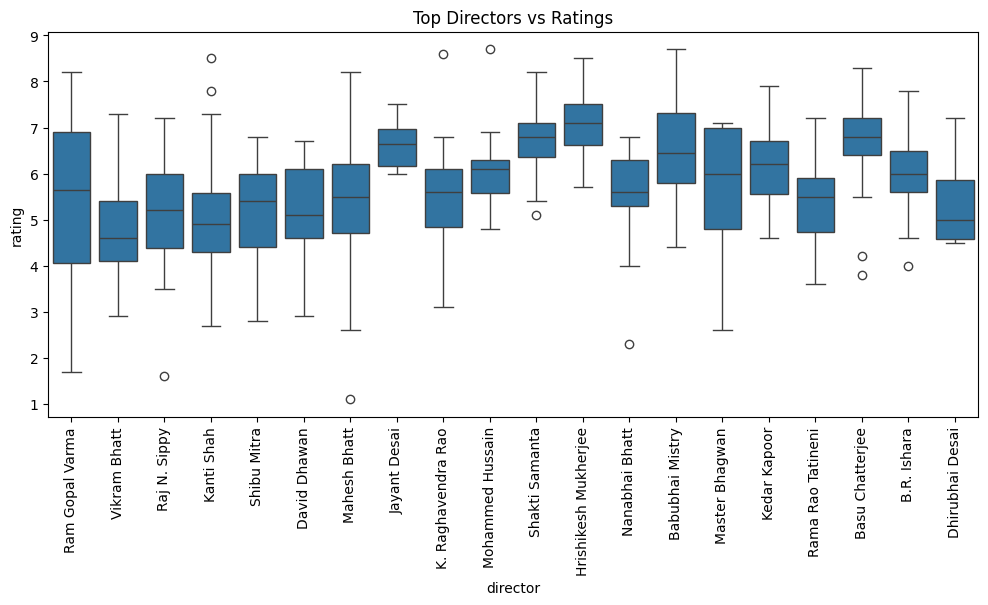

In [37]:
top_directors = df["director"].value_counts().head(20).index
plt.figure(figsize=(12, 5))
sns.boxplot(data=df[df["director"].isin(top_directors)], x="director", y="rating")
plt.xticks(rotation=90)
plt.title("Top Directors vs Ratings")
plt.show()

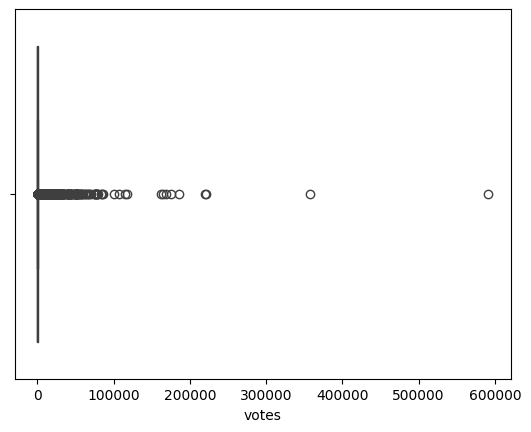

In [38]:
sns.boxplot(x=df["votes"])
plt.show()

In [39]:
df.rename(columns={"year": "year_int"}, inplace=True)

In [40]:
# Split genres into a list
df["genre_split"] = df["genre"].fillna("Unknown").apply(lambda x: x.split(","))

# Count of genres per movie
df["genre_count"] = df["genre_split"].apply(len)

In [41]:
# Compute avg rating per director
director_rating = df.groupby("director")["rating"].mean().to_dict()
df["director_avg_rating"] = df["director"].map(director_rating)

In [42]:
from collections import defaultdict

# All actors
actor_cols = ["actor 1", "actor 2", "actor 3"]

# Store ratings per actor
actor_rating_dict = defaultdict(list)

for col in actor_cols:
    for actor, rating in zip(df[col], df["rating"]):
        actor_rating_dict[actor].append(rating)

# Average rating per actor
actor_avg_rating = {
    actor: sum(ratings) / len(ratings) for actor, ratings in actor_rating_dict.items()
}


# Compute avg actor popularity for each movie
def compute_actor_popularity(row):
    ratings = [actor_avg_rating.get(row.get(actor, None), 0) for actor in actor_cols]
    return sum(ratings) / len(ratings)


df["actor_popularity"] = df.apply(compute_actor_popularity, axis=1)

In [43]:
categorical_cols = df.select_dtypes(include="object").columns.tolist()

In [44]:
df.dropna(subset=["rating", "votes", "year_int"], inplace=True)
df.drop(columns=["Name", "actor 1", "actor 2", "actor 3", "director", "genre"], inplace=True, errors='ignore')

In [45]:
print("✅ Final shape:", df.shape)
print("✅ Columns used:", df.columns.tolist())

✅ Final shape: (7919, 9)
✅ Columns used: ['name', 'year_int', 'duration', 'rating', 'votes', 'genre_split', 'genre_count', 'director_avg_rating', 'actor_popularity']


In [46]:
df.to_csv("../dataset/movie_data_featured.csv", index=False)